       ID  Edad  Salario Compra
0       1    56    71212     Sí
1       2    46    25287     No
2       3    32    54387     Sí
3       4    60    28512     No
4       5    25    21342     No
..    ...   ...      ...    ...
995   996    22    28712     No
996   997    40    58565     Sí
997   998    27    29208     No
998   999    61    76251     Sí
999  1000    19    25109     No

[1000 rows x 4 columns]
Accuracy: 0.995


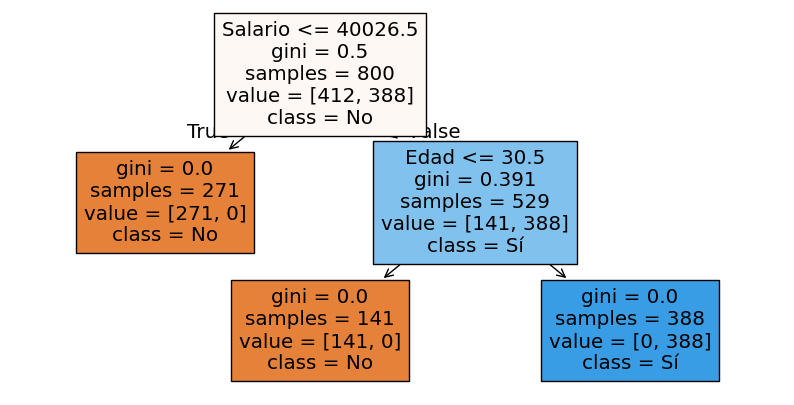

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Generar datos de ejemplo
np.random.seed(42)
n_samples = 1000
edad = np.random.randint(18, 65, size=n_samples)
salario = np.random.randint(20000, 80000, size=n_samples)
compra = np.where((edad > 30) & (salario > 40000), 'Sí', 'No')

data = {
    'ID': range(1, n_samples + 1),
    'Edad': edad,
    'Salario': salario,
    'Compra': compra
}
df = pd.DataFrame(data)

print(df)

# Preparación de datos
X = df[['Edad', 'Salario']]
y = df['Compra']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo Árbol de Decisión
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Visualización del árbol
plt.figure(figsize=(10,5))
plot_tree(model, feature_names=['Edad', 'Salario'], class_names=['No', 'Sí'], filled=True)
plt.show()

In [26]:
# Importar bibliotecas necesarias
import numpy as np
import pandas as pd

# Datos de ejemplo: Probabilidad de spam y no spam
P_spam = 0.8
P_non_spam = 0.2

# Probabilidad de palabras dado spam y no spam
P_word_given_spam = {'oferta': 0.1, 'gratis': 0.05, 'compra': 0.02}
P_word_given_non_spam = {'oferta': 0.01, 'gratis': 0.005, 'compra': 0.002}

# Nuevo correo a evaluar
new_email = ['Oferta', "Gratis", "Compra"]

# Calcular probabilidad de que el correo sea spam y no spam
P_spam_given_email = P_spam
P_non_spam_given_email = P_non_spam

for word in new_email:
    P_spam_given_email *= P_word_given_spam.get(word, 0.01)
    P_non_spam_given_email *= P_word_given_non_spam.get(word, 0.01)

# Normalizar probabilidades
P_total = P_spam_given_email + P_non_spam_given_email
P_spam_given_email /= P_total
P_non_spam_given_email /= P_total

print(f'Probabilidad de spam: {P_spam_given_email}')
print(f'Probabilidad de no spam: {P_non_spam_given_email}')

Probabilidad de spam: 0.7999999999999999
Probabilidad de no spam: 0.19999999999999998


Accuracy: 0.88


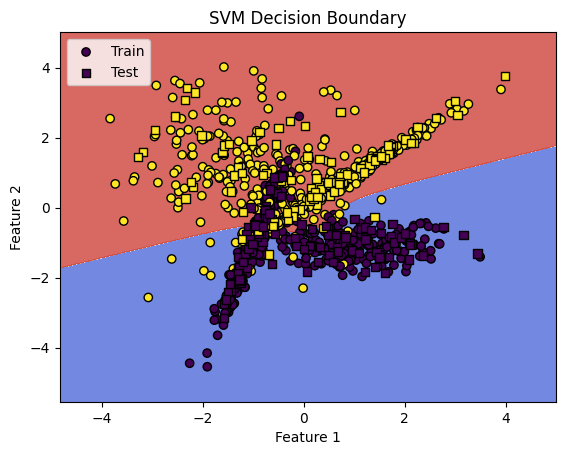

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Generar datos de ejemplo
X, y = datasets.make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0) #random_state=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo SVM
model = SVC(kernel='poly')
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Crear una malla para las fronteras de decisión
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predecir en la malla
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Graficar
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', edgecolor='k', label='Train')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='s', edgecolor='k', label='Test')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary')
plt.legend()
plt.show()